In [15]:
import polars as pl
import numpy as np
import statsmodels.api as sm

# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort("symbol")

x1 = 50
x2 = 50

df = df.with_columns([
    (pl.col('quote_volume') / pl.col('volume')).alias('vwap'),
    (pl.col('volume') - pl.col('volume').shift(x1)).alias('volume_change'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

df = df.with_columns([
    (pl.col('vwap') - pl.col('close')).rolling_max(x2).alias('vwap_close_max'),
    (pl.col('vwap') - pl.col('close')).rolling_min(x2).alias('vwap_close_min')
])

df = df.with_columns([
    pl.col('vwap_close_max').rank('dense').over('open_time').alias('vwap_close_max_rank'),
    pl.col('vwap_close_min').rank('dense').over('open_time').alias('vwap_close_min_rank'),
    pl.col('volume_change').rank('dense').over('open_time').alias('volume_change_rank')
])

df = df.with_columns([
    (pl.col('vwap_close_max_rank') + pl.col('vwap_close_min_rank') * pl.col('volume_change_rank')).alias('alpha011_rank')
])

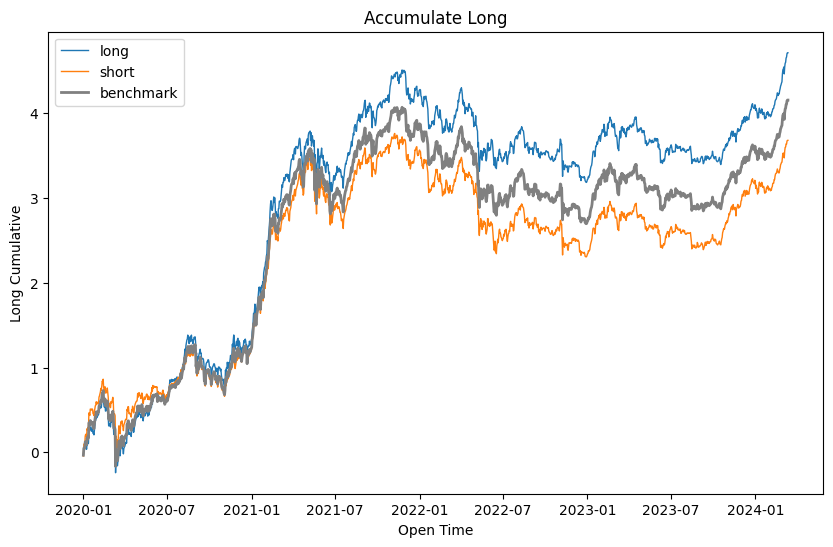

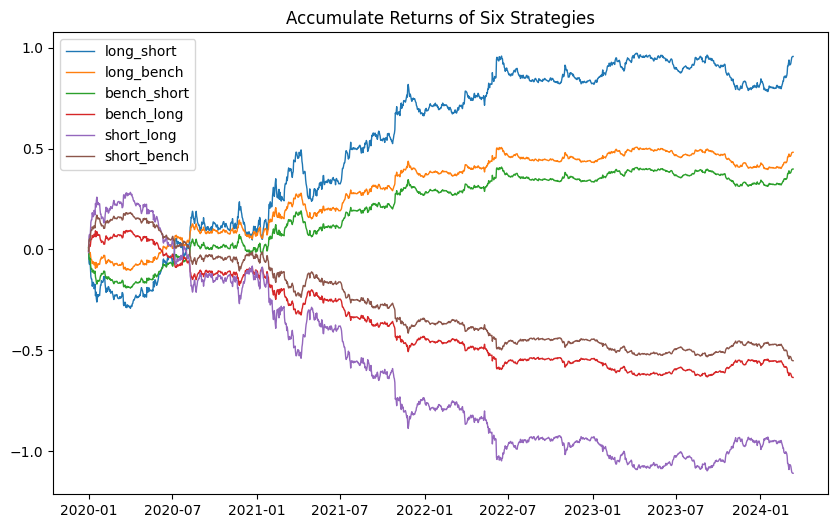

long: 
ann_return = 26.9352  sharpe = 5.6818  maxdd = 0.5482  calmar_ratio = 49.1358  

short: 
ann_return = 21.0294  sharpe = 4.7136  maxdd = 0.4642  calmar_ratio = 45.3012  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = 5.4678  sharpe = 4.4341  maxdd = 0.3031  calmar_ratio = 18.0408  

long_bench: 
ann_return = 2.7524  sharpe = 4.4534  maxdd = 0.1107  calmar_ratio = 24.8541  

bench_long: 
ann_return = -3.6284  sharpe = -5.8707  maxdd = 0.6667  calmar_ratio = -5.4424  

short_long: 
ann_return = -6.3438  sharpe = -5.1444  maxdd = 1.0859  calmar_ratio = -5.8421  

short_bench: 
ann_return = -3.1534  sharpe = -5.057  maxdd = 0.6212  calmar_ratio = -5.0761  

bench_short: 
ann_return = 2.2774  sharpe = 3.6521  maxdd = 0.1992  calmar_ratio = 11.4351  



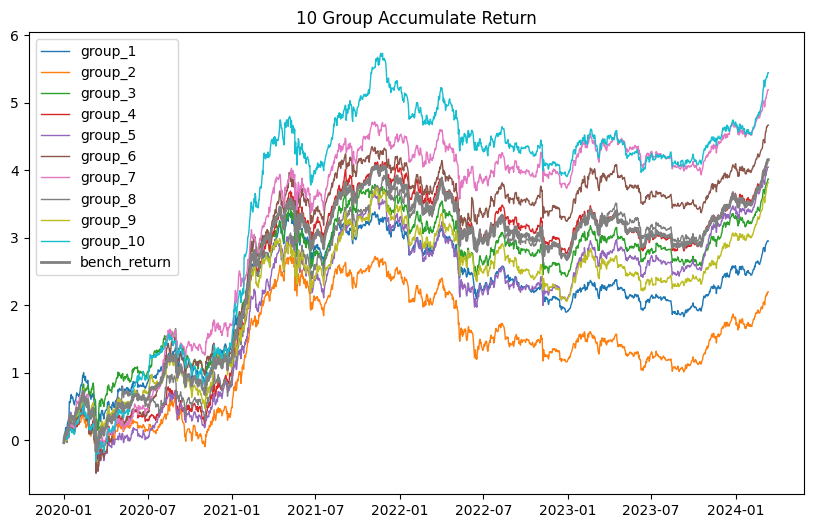

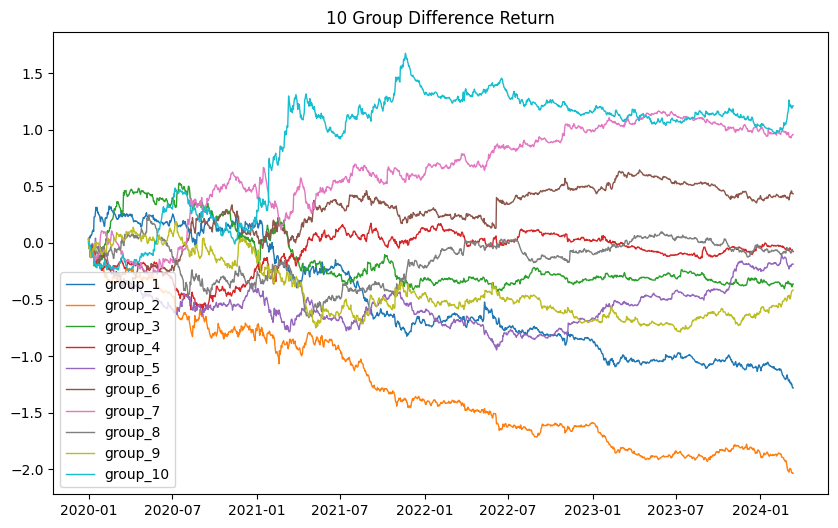

group_1: 
ann_return = 16.8665  sharpe = 3.9466  maxdd = 0.4605  calmar_ratio = 36.6229  

group_2: 
ann_return = 12.5606  sharpe = 2.7707  maxdd = 0.613  calmar_ratio = 20.4899  

group_3: 
ann_return = 22.1076  sharpe = 4.6821  maxdd = 0.3928  calmar_ratio = 56.2884  

group_4: 
ann_return = 23.7449  sharpe = 5.0244  maxdd = 0.5486  calmar_ratio = 43.2827  

group_5: 
ann_return = 23.1106  sharpe = 4.7745  maxdd = 0.6619  calmar_ratio = 34.9173  

group_6: 
ann_return = 26.6658  sharpe = 5.4711  maxdd = 0.6585  calmar_ratio = 40.4972  

group_7: 
ann_return = 29.6536  sharpe = 6.0145  maxdd = 0.5532  calmar_ratio = 53.6066  

group_8: 
ann_return = 23.7594  sharpe = 4.7386  maxdd = 0.5235  calmar_ratio = 45.3859  

group_9: 
ann_return = 21.7995  sharpe = 4.3634  maxdd = 0.4928  calmar_ratio = 44.2351  

group_10: 
ann_return = 31.1012  sharpe = 6.0676  maxdd = 0.5561  calmar_ratio = 55.9249  

-----------------------------------------
group_difference_1: 
ann_return = -7.3164  sharp

In [16]:
factors = df.select(['open_time', 'symbol', 'alpha011_rank'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()